# Jupyter and Pandas Basics

_Uses normal markdown syntax_ **bold**

Can run commands a if using the python cli

In [1]:
4 + 3

7

In [2]:
x = 23
x + 10

33

In [3]:
import json
data = [ { 'a':'A', 'b':(2, 4), 'c':3.0 } ]
print(json.dumps(data))

[{"a": "A", "b": [2, 4], "c": 3.0}]


## Pandas

In [4]:
%matplotlib inline 
import pandas as pd
import numpy as np

DataFrame is like a table in a db,  
Series is like a field in a table

In [5]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
df = pd.read_csv('data/queue_import.csv')

Data overview

In [7]:
df.head()

,batchid,timestamp,load_time,ledgers,payments,balances,cashflows
0,1499891859419,2017-07-12 21:37:39,452829,15563,3540,0,3893
1,1499892160679,2017-07-12 21:42:40,44932,27025,5393,0,6382
2,1499892620941,2017-07-12 21:50:20,27271,3095,1346,0,1032
3,1499892670920,2017-07-12 21:51:10,25708,2015,562,0,618
4,1499892701779,2017-07-12 21:51:41,23605,1859,422,0,464


Brief set of stats of the data

In [8]:
df.describe()

,batchid,load_time,ledgers,payments,balances,cashflows
count,3.890000e+02,389.000000,389.000000,389.000000,389.0,389.000000
mean,1.499897e+12,13758.048843,1131.105398,257.069409,0.0,282.776350
std,2.118705e+06,24347.494773,1613.308792,340.429395,0.0,389.332602
min,1.499892e+12,4610.000000,29.000000,6.000000,0.0,7.000000
25%,1.499895e+12,8399.000000,793.000000,180.000000,0.0,198.000000
50%,1.499897e+12,9696.000000,862.000000,196.000000,0.0,215.000000
75%,1.499899e+12,11699.000000,955.000000,217.000000,0.0,239.000000
max,1.499900e+12,452829.000000,27025.000000,5393.000000,0.0,6382.000000


Access a single column

In [9]:
df['ledgers']  # returns a series

0      15563
1      27025
2       3095
3       2015
4       1859
5       1763
6       1783
7       1864
8       2388
9       2427
10      1989
11      1887
12      2444
13      2781
14      2458
15      2437
16      2574
17      2455
18      2628
19      2544
20      2692
21      3049
22      2886
23      3066
24      4948
25      4942
26      2698
27      2470
28      2699
29      2767
       ...  
359      745
360      865
361      857
362      822
363      787
364      883
365     1016
366      901
367      904
368      995
369      855
370      766
371      806
372      776
373      752
374      810
375      829
376      758
377      806
378      859
379      876
380      950
381      964
382      868
383      849
384      889
385      833
386      750
387      714
388      366
Name: ledgers, dtype: int64

Can take a series, filter it and apply a function

In [10]:
x = df['ledgers'][:10]
x = x * 100
x

0    1556300
1    2702500
2     309500
3     201500
4     185900
5     176300
6     178300
7     186400
8     238800
9     242700
Name: ledgers, dtype: int64

Get a number of columns

In [11]:
df[['ledgers', 'cashflows']][:10]

,ledgers,cashflows
0,15563,3893
1,27025,6382
2,3095,1032
3,2015,618
4,1859,464
5,1763,441
6,1783,446
7,1864,466
8,2388,597
9,2427,607


Filter

In [12]:
df[df.ledgers > 3000]

,batchid,timestamp,load_time,ledgers,payments,balances,cashflows
0,1499891859419,2017-07-12 21:37:39,452829,15563,3540,0,3893
1,1499892160679,2017-07-12 21:42:40,44932,27025,5393,0,6382
2,1499892620941,2017-07-12 21:50:20,27271,3095,1346,0,1032
21,1499893352127,2017-07-12 22:02:32,47052,3049,693,0,762
23,1499893446588,2017-07-12 22:04:06,108364,3066,697,0,766
24,1499893496187,2017-07-12 22:04:56,43831,4948,1124,0,1237
25,1499893608497,2017-07-12 22:06:48,34718,4942,1123,0,1236


Convert the type of a field and set it as the index

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df.head()

,batchid,load_time,ledgers,payments,balances,cashflows
timestamp,,,,,,
2017-07-12 21:37:39,1499891859419,452829,15563,3540,0,3893
2017-07-12 21:42:40,1499892160679,44932,27025,5393,0,6382
2017-07-12 21:50:20,1499892620941,27271,3095,1346,0,1032
2017-07-12 21:51:10,1499892670920,25708,2015,562,0,618
2017-07-12 21:51:41,1499892701779,23605,1859,422,0,464


Can plot straight from the dataframe using matplotlib

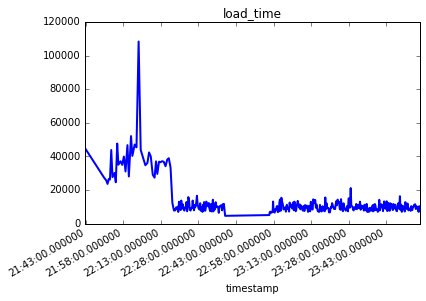

In [14]:
df['load_time'][1:].plot(title='load_time', linewidth=2);